### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [37]:
import pandas as pd

'''Ingreso total Tienda'''
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

print("=== Ingreso total por tienda ===")
for ingreso,tienda in tiendas.items():
    total = tienda['Precio'].sum()
    print(f"{ingreso}: {total:.2f}")





=== Ingreso total por tienda ===
Tienda 1: 1038375700.00
Tienda 2: 1116343500.00
Tienda 3: 1098019600.00
Tienda 4: 1038375700.00


# 2. Ventas por categoría

In [38]:
'''Cantidad categoria Tienda'''

print("\n=== Ventas por categoría ===")
for categoria, tienda in tiendas.items():
    conteo = tienda['Categoría del Producto'].value_counts()
    categoria_top = conteo.idxmax()
    print(f"{categoria}: Categoría más vendida -> {categoria_top}")
    print(conteo, "\n")



=== Ventas por categoría ===
Tienda 1: Categoría más vendida -> Muebles
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64 

Tienda 2: Categoría más vendida -> Muebles
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Tienda 3: Categoría más vendida -> Muebles
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Art

# 3. Calificación promedio de la tienda


In [39]:
'''Calificacion Tienda'''

print("\n=== Calificación promedio por tienda ===")
for calificacion, tienda in tiendas.items():
    promedio = round(tienda['Calificación'].mean(), 2)
    print(f"{calificacion}: {promedio}")



=== Calificación promedio por tienda ===
Tienda 1: 4.0
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


# 4. Productos más y menos vendidos


=== Tienda 1 ===
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


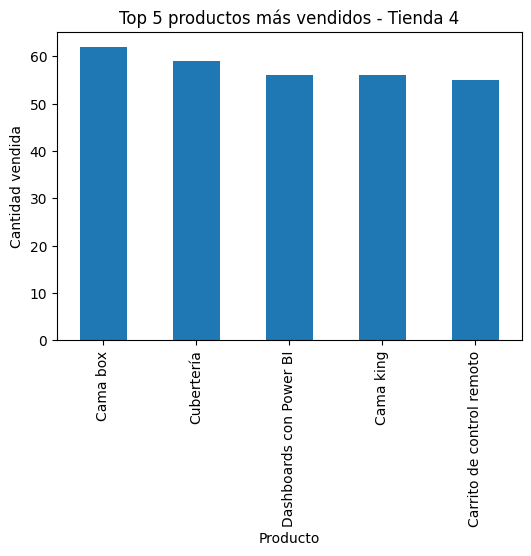


=== Tienda 2 ===
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)


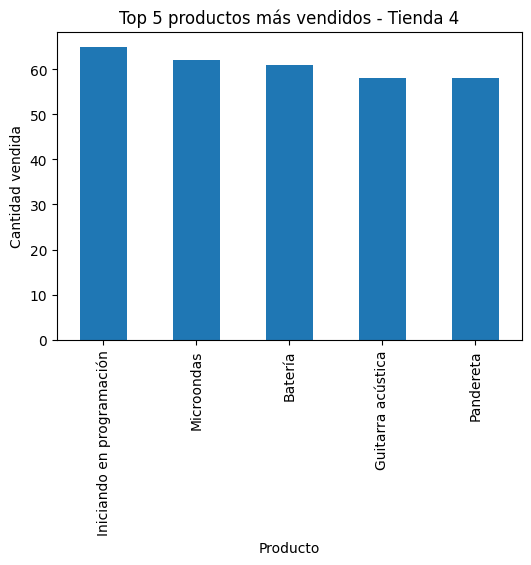


=== Tienda 3 ===
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)


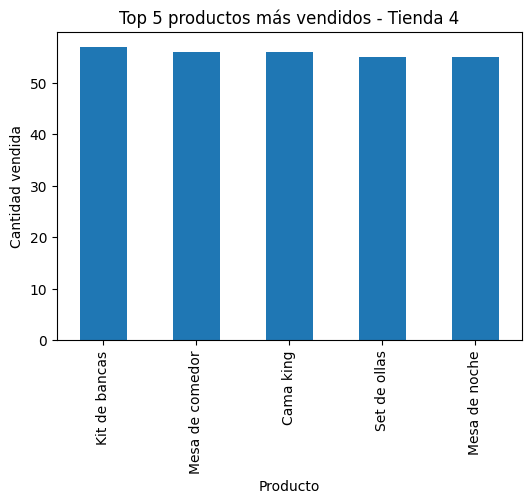


=== Tienda 4 ===
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


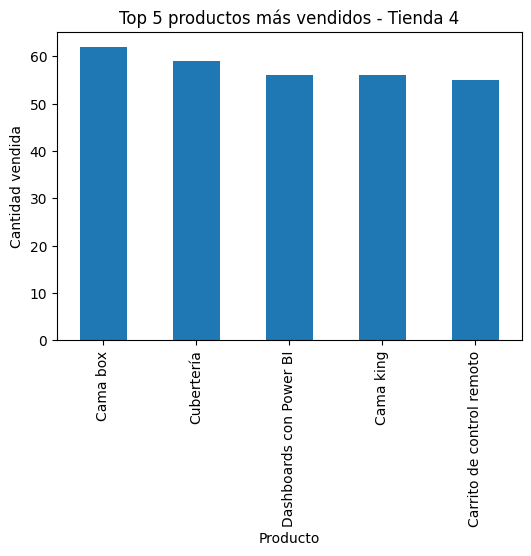

In [40]:
import matplotlib.pyplot as plt
'''Productos más vendidos y menos vendidos'''

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}


for vendido, tienda in tiendas.items():
    print(f"\n=== {vendido} ===")

    # Conteo de productos vendidos
    conteo_productos = tienda['Producto'].value_counts()

    # Producto más y menos vendido
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()

    print(f"Producto más vendido: {mas_vendido} ({conteo_productos.max()} ventas)")
    print(f"Producto menos vendido: {menos_vendido} ({conteo_productos.min()} ventas)")

    # Visualización: Top 5 productos más vendidos
    top5 = conteo_productos.head(5)
    top5.plot(kind='bar', figsize=(6,4), title=f"Top 5 productos más vendidos - {nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad vendida")
    plt.show()


# 5. Envío promedio por tienda

In [41]:
'''Valor del envío promedio por tienda'''

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

print("=== Valor promedio del envío por tienda ===")
for venta, tienda in tiendas.items():
    # Calcula el costo promedio del envío
    promedio_envio = round(tienda['Costo de envío'].mean(), 2)
    print(f"{venta}: ${promedio_envio}")


=== Valor promedio del envío por tienda ===
Tienda 1: $23459.46
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


# 6. GRÁFICO DE BARRAS: Ingreso total por tienda

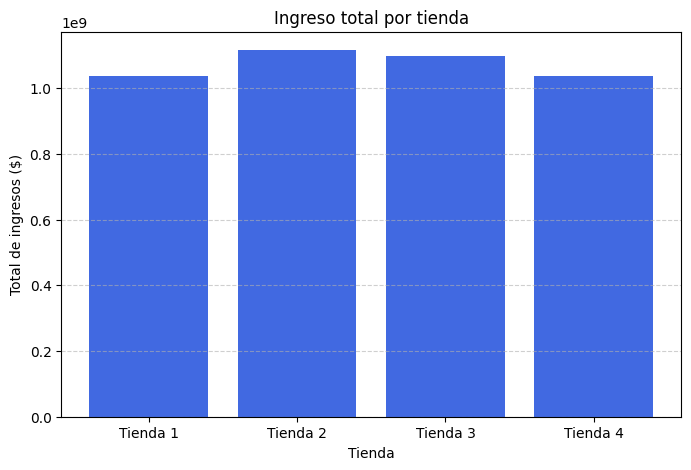

In [23]:
ingresos = {ingreso: tienda['Precio'].sum() for ingreso, tienda in tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values(), color='royalblue')
plt.title("Ingreso total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Total de ingresos ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# 7. GRÁFICO CIRCULAR: Distribución de categorías más vendidas

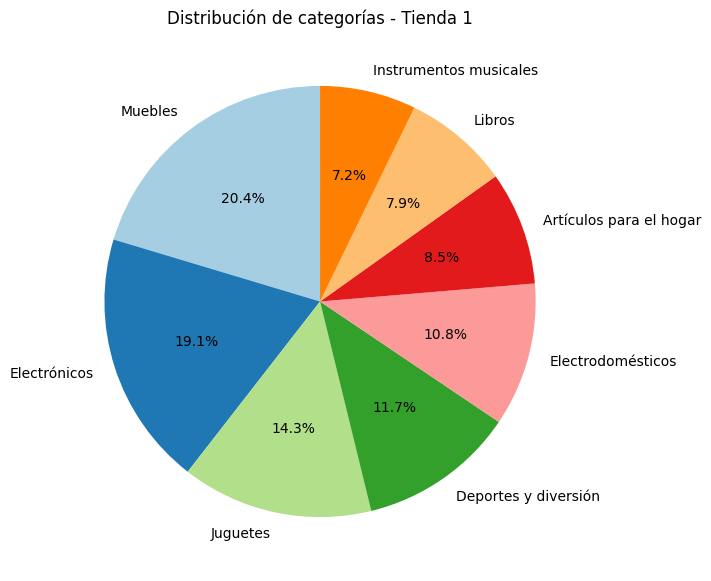

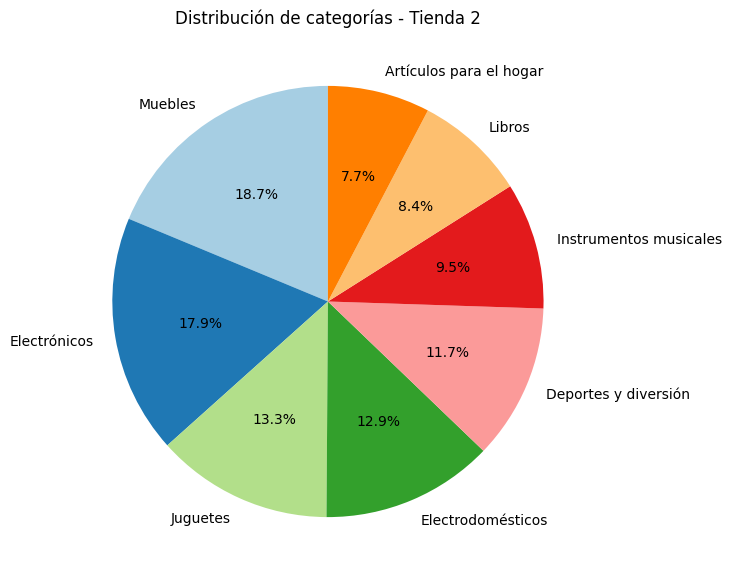

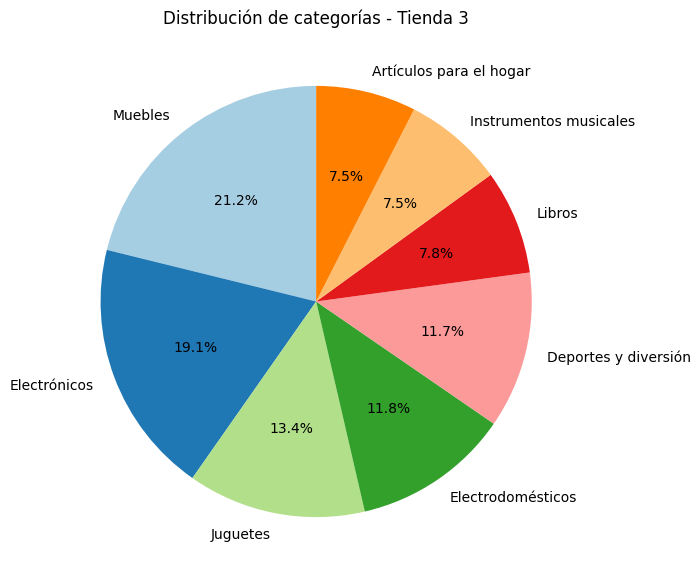

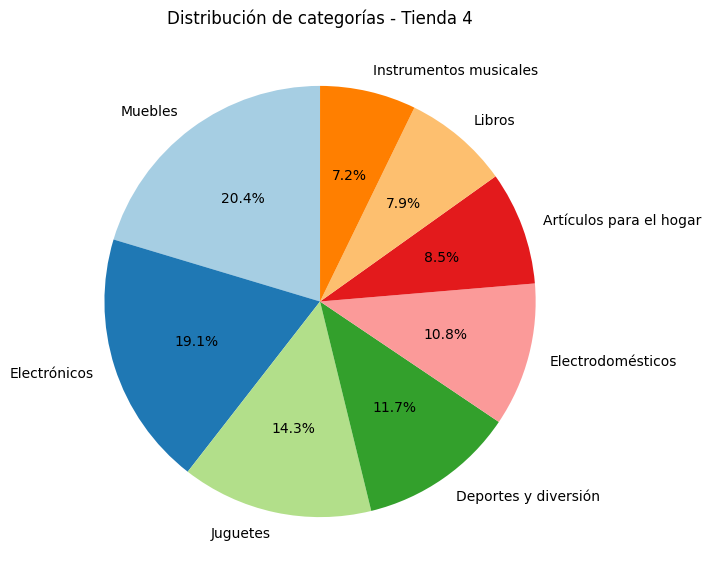

In [22]:

for categoria, tienda in tiendas.items():
    plt.figure(figsize=(7, 7))
    categorias = tienda['Categoría del Producto'].value_counts()
    categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Distribución de categorías - {categoria}")
    plt.ylabel("")  # quitar etiqueta lateral
    plt.show()



# 8. GRÁFICO DE DISPERSIÓN: Precio vs Calificación

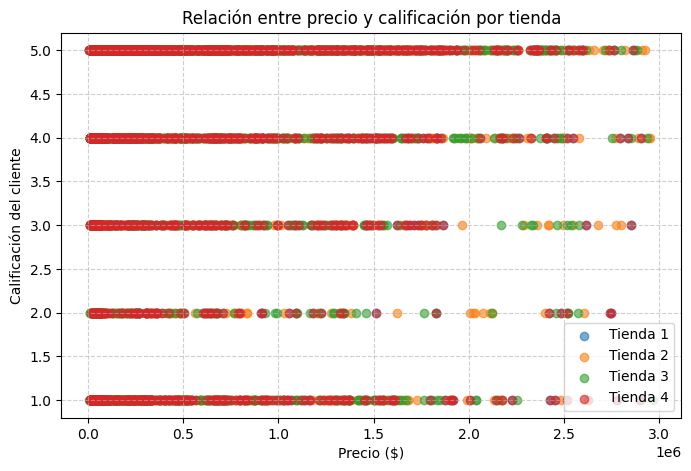

In [34]:
plt.figure(figsize=(8, 5))
for dispersion, tienda in tiendas.items():
    plt.scatter(tienda['Precio'], tienda['Calificación'], label=dispersion, alpha=0.6)

plt.title("Relación entre precio y calificación por tienda")
plt.xlabel("Precio ($)")
plt.ylabel("Calificación del cliente")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 9. GRÁFICO DE DISPERSIÓN: desempeño geográfico

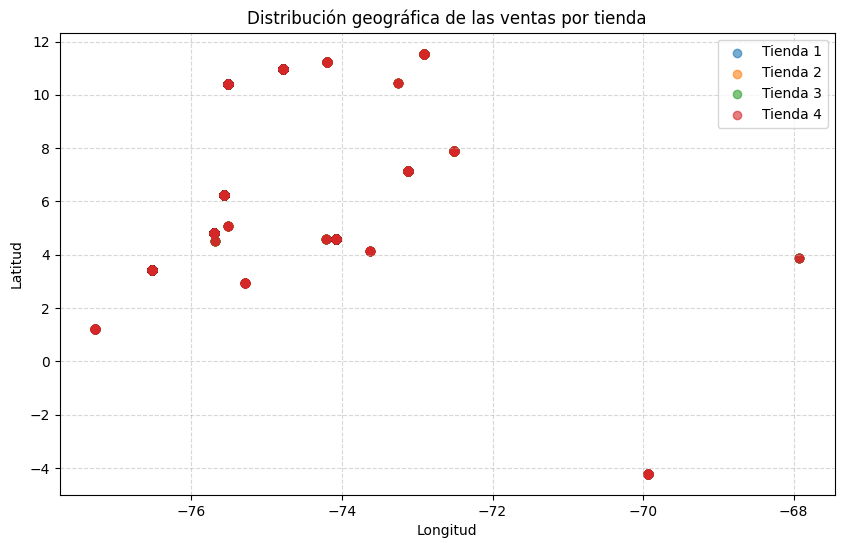

In [42]:
plt.figure(figsize=(10, 6))

for nombre, geografia in tiendas.items():
    plt.scatter(geografia['lon'], geografia['lat'], label=nombre, alpha=0.6)

plt.title("Distribución geográfica de las ventas por tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


